$$\sigma(z) = \frac{1}{1 + \exp^{-z}}$$

In [2]:
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Sigmod Function')

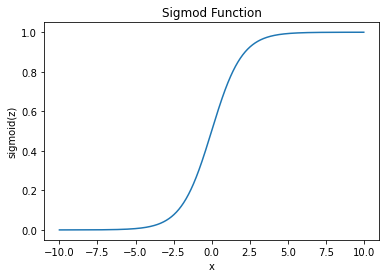

In [5]:
def sigma(x):
    return 1/(1+np.exp(-x))

xx = np.linspace(-10,10, 1000)
plt.plot(xx, [sigma(x) for x in xx])
plt.xlabel('x')
plt.ylabel('sigmoid(z)')
plt.title('Sigmod Function')

逻辑回归正则化示例

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
# 读取数据集
data = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1283/microchip_tests.txt',
                   header=None, names=('test1', 'test2', 'released'))
# 查看数据集的一些信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


使用 Pandas 库的 read_csv() 方法加载数据。这个数据集内有 118 个微芯片（目标），其中有两项质量控制测试的结果（两个数值变量）和微芯片是否投产的信息。变量已经过归一化，即列中的值已经减去其均值。所以，微芯片的平均测试值为零。

In [8]:
data.head(5),data.tail(5)

(      test1    test2  released
 0  0.051267  0.69956         1
 1 -0.092742  0.68494         1
 2 -0.213710  0.69225         1
 3 -0.375000  0.50219         1
 4 -0.513250  0.46564         1,
         test1     test2  released
 113 -0.720620  0.538740         0
 114 -0.593890  0.494880         0
 115 -0.484450  0.999270         0
 116 -0.006336  0.999270         0
 117  0.632650 -0.030612         0)

In [9]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values
X,y

(array([[ 0.051267 ,  0.69956  ],
        [-0.092742 ,  0.68494  ],
        [-0.21371  ,  0.69225  ],
        [-0.375    ,  0.50219  ],
        [-0.51325  ,  0.46564  ],
        [-0.52477  ,  0.2098   ],
        [-0.39804  ,  0.034357 ],
        [-0.30588  , -0.19225  ],
        [ 0.016705 , -0.40424  ],
        [ 0.13191  , -0.51389  ],
        [ 0.38537  , -0.56506  ],
        [ 0.52938  , -0.5212   ],
        [ 0.63882  , -0.24342  ],
        [ 0.73675  , -0.18494  ],
        [ 0.54666  ,  0.48757  ],
        [ 0.322    ,  0.5826   ],
        [ 0.16647  ,  0.53874  ],
        [-0.046659 ,  0.81652  ],
        [-0.17339  ,  0.69956  ],
        [-0.47869  ,  0.63377  ],
        [-0.60541  ,  0.59722  ],
        [-0.62846  ,  0.33406  ],
        [-0.59389  ,  0.005117 ],
        [-0.42108  , -0.27266  ],
        [-0.11578  , -0.39693  ],
        [ 0.20104  , -0.60161  ],
        [ 0.46601  , -0.53582  ],
        [ 0.67339  , -0.53582  ],
        [-0.13882  ,  0.54605  ],
        [-0.29

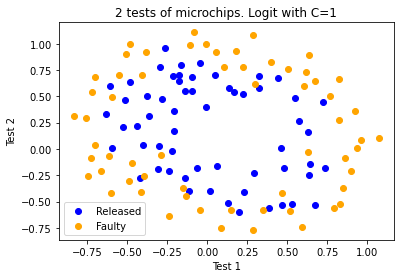

In [10]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=1')
plt.legend()

In [11]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))

    # 在 [x_min, m_max]x[y_min, y_max] 的每一点都用它自己的颜色来对应
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [12]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly.shape

(118, 36)

Accuracy on training set: 0.627


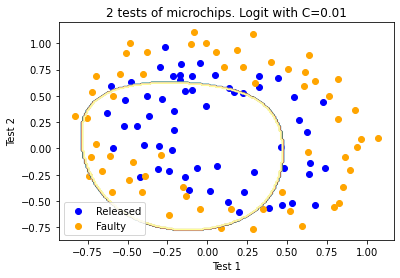

In [13]:
C = 1e-2
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend()

print("Accuracy on training set:",
      round(logit.score(X_poly, y), 3))

Accuracy on training set: 0.831


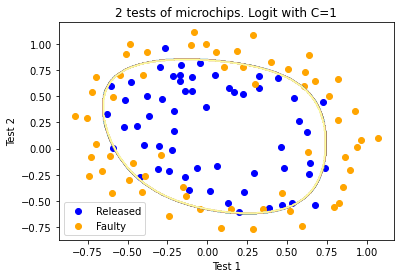

In [14]:
C = 1
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend()

print("Accuracy on training set:",
      round(logit.score(X_poly, y), 3))

Accuracy on training set: 0.873


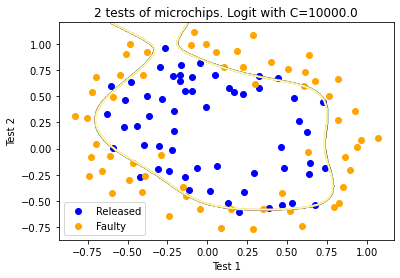

In [15]:
C = 1e4
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend()

print("Accuracy on training set:",
      round(logit.score(X_poly, y), 3))

In [16]:
# 该单元格执行时间较长，请耐心等待
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
# 下方结尾的切片为了在线上环境搜索更快，线下练习时可以删除
c_values = np.logspace(-2, 3, 500)[50:450:50]

logit_searcher = LogisticRegressionCV(
    Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


LogisticRegressionCV(Cs=array([3.16958209e-02, 1.00462506e-01, 3.18424160e-01, 1.00927151e+00,
       3.19896892e+00, 1.01393946e+01, 3.21376434e+01, 1.01862899e+02]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=1)

In [17]:
logit_searcher.C_

array([10.13939458])

Text(0, 0.5, 'Mean CV-accuracy')

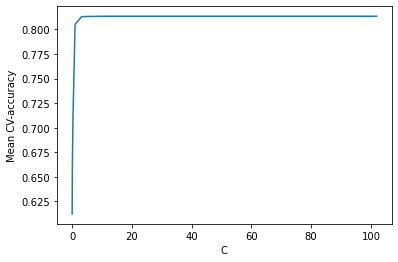

In [18]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')

(0.0, 10.0)

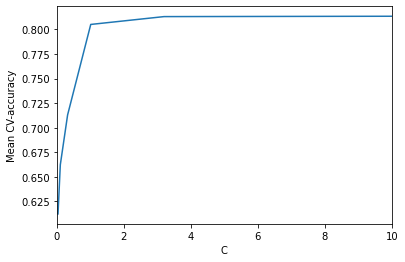

In [19]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')
plt.xlim((0, 10))

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression